In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv("winequality-white.csv", sep=";")

#pd.options.display.max_rows = 5000

dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [2]:
wines = dataset.drop(axis = 0, index = 2781)
wines = wines.drop(axis = 0, index = 4745)


reviews = []
for i in wines['quality']:
    if i >= 0 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
wines['reviews'] = reviews

In [3]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,6.854749,0.278105,0.334154,6.379994,0.045766,35.261846,138.294628,0.994018,3.188174,0.489775,10.514028,5.878472
std,0.843864,0.100336,0.120979,5.001264,0.021849,16.615005,42.286355,0.002922,0.150961,0.114093,1.230755,0.884862
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,146.500000,366.500000,1.010300,3.820000,1.080000,14.200000,9.000000


In [4]:
wines.mode()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,reviews
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6,2


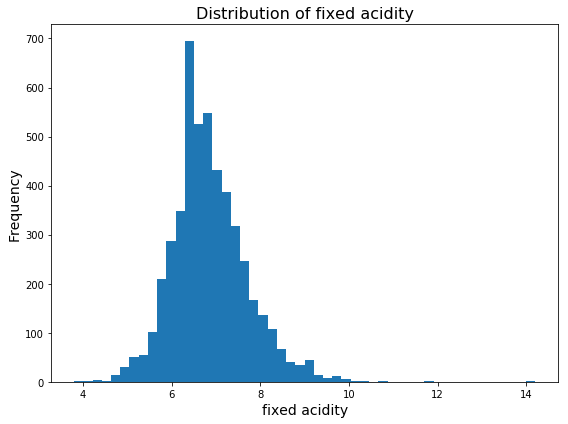

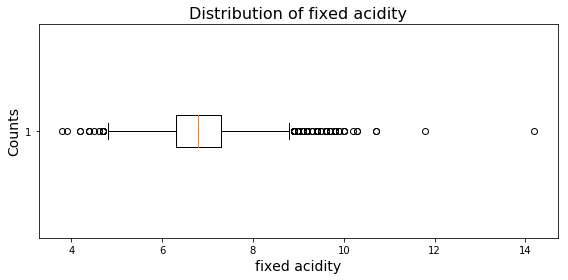

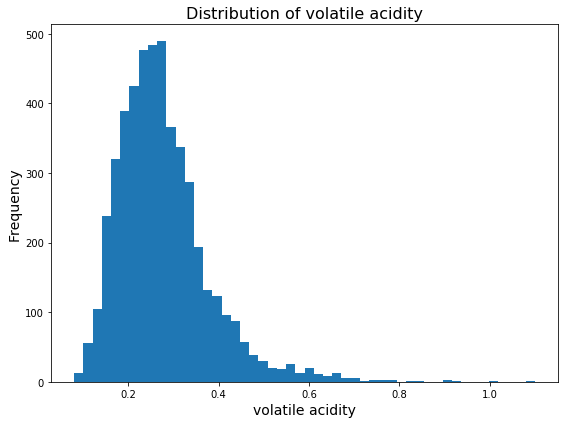

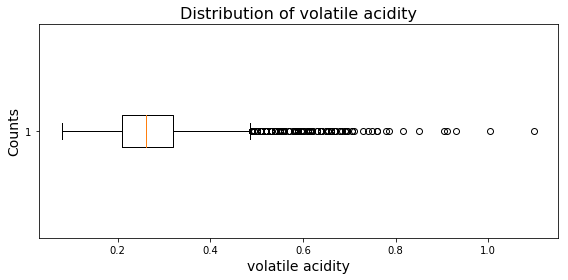

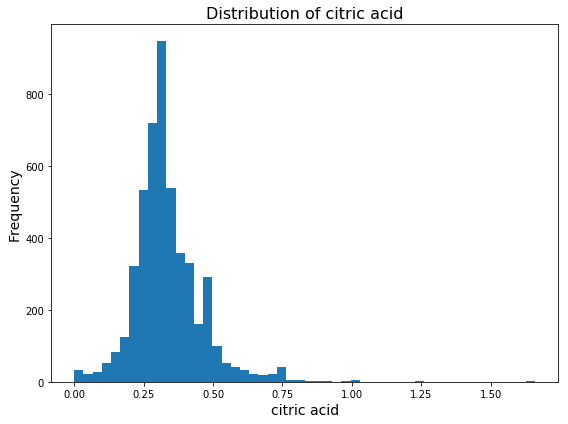

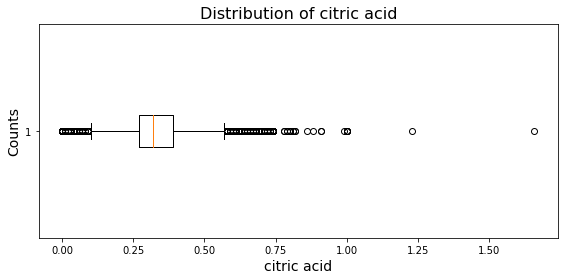

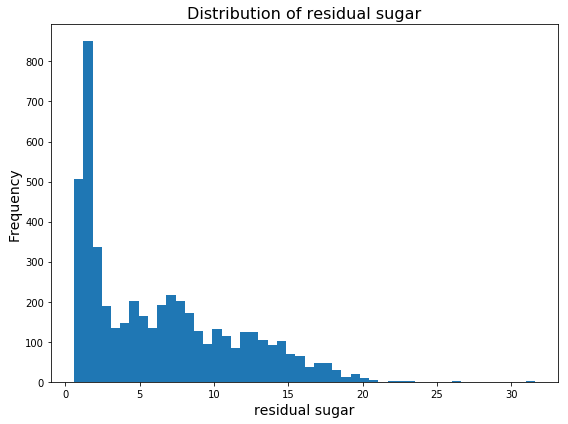

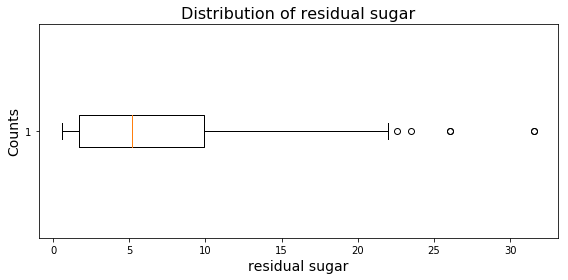

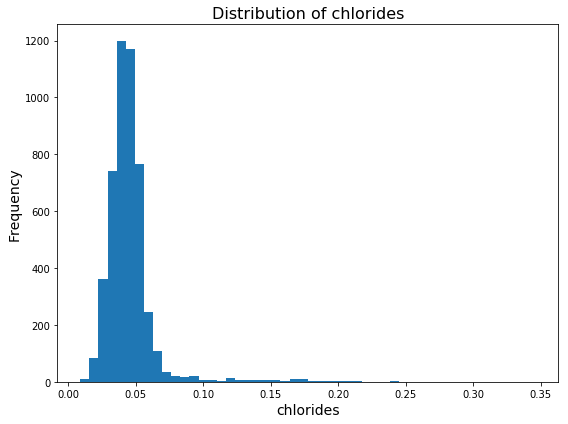

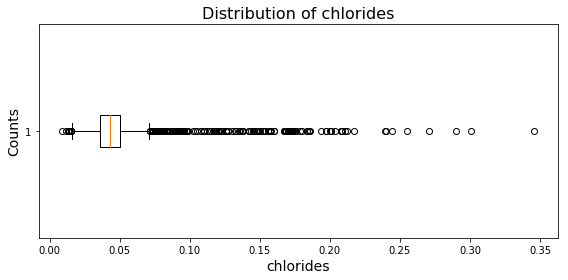

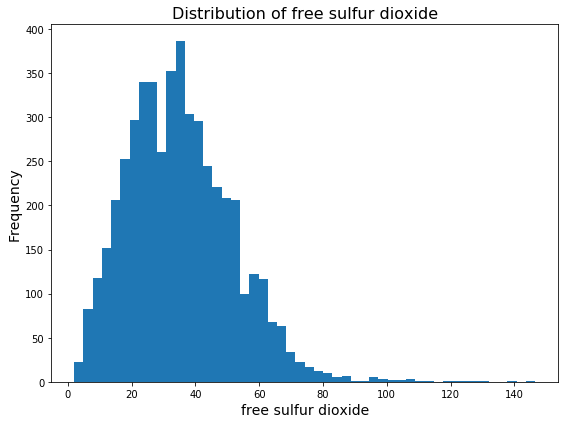

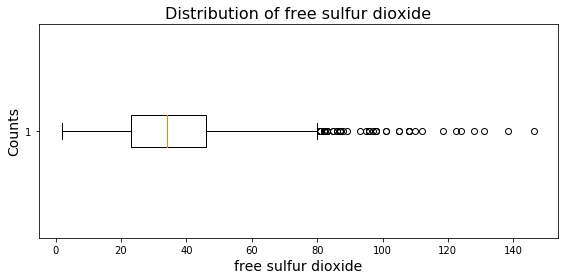

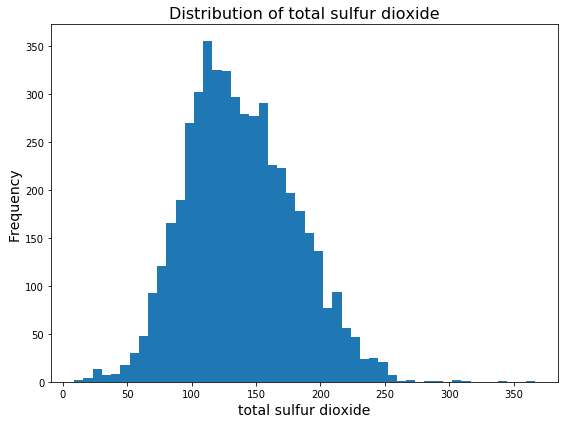

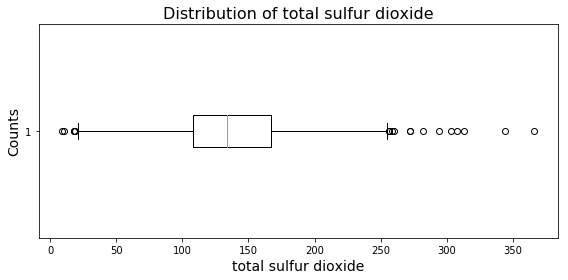

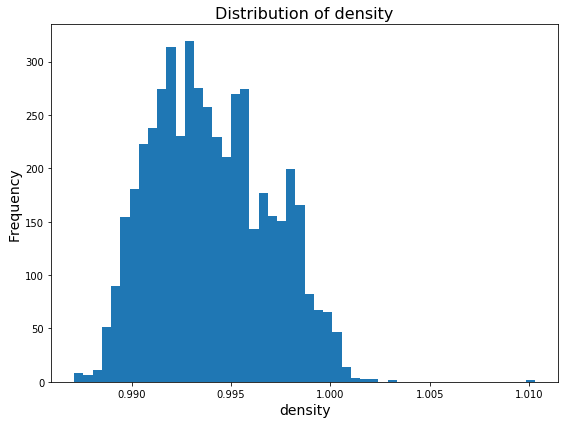

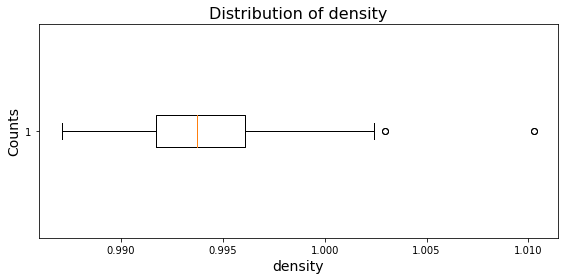

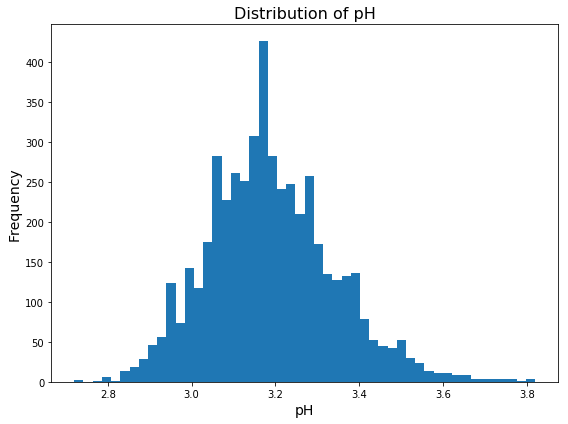

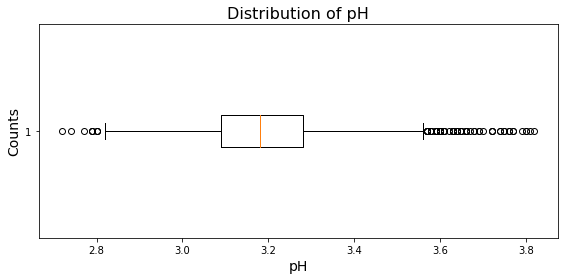

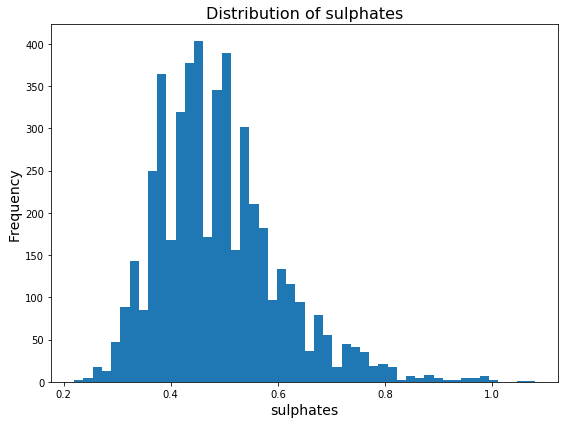

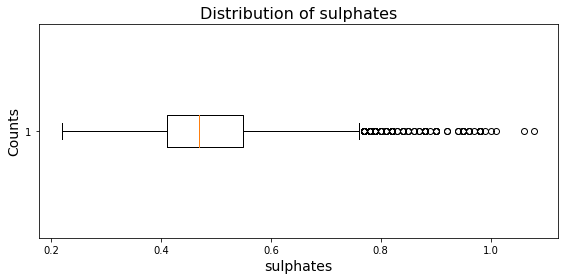

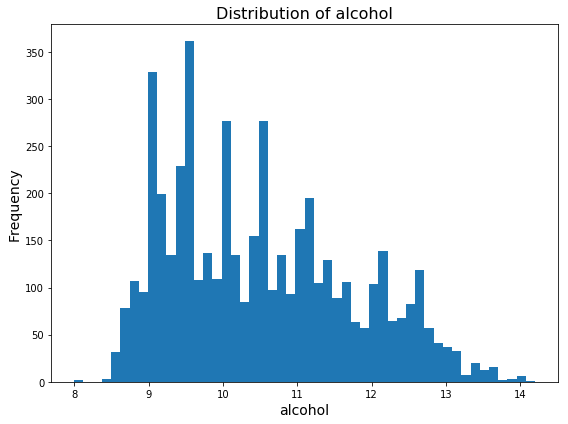

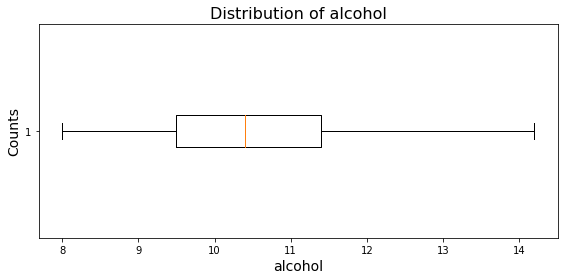

In [5]:
def print_hist_and_boxplot(column_name):
    

    num_bins = 50
    
#     mu = wines[column_name].mean()  # mean of distribution
#     sigma = wines[column_name].std()  # standard deviation of distribution

    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(wines[column_name], num_bins)
    
    title = 'Distribution of ' + column_name
    ax.set_ylabel('Frequency', size=14)
    ax.set_xlabel(column_name, size=14)
    ax.set_title(title, size=16)

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

    fig_1, ax_1 = plt.subplots(figsize=(8,4))
    ax_1.boxplot(wines[column_name],vert=False)
    title_1 = 'Boxplot of ' + column_name
    ax_1.set_ylabel('Counts', size=14)
    ax_1.set_xlabel(column_name, size=14)
    ax_1.set_title(title, size=16)

    # Tweak spacing to prevent clipping of ylabel
    fig_1.tight_layout()
    plt.show()
    
column_list = wines.columns.values.tolist()
column_list = column_list[:-2]


for i in column_list:
    print_hist_and_boxplot(i)

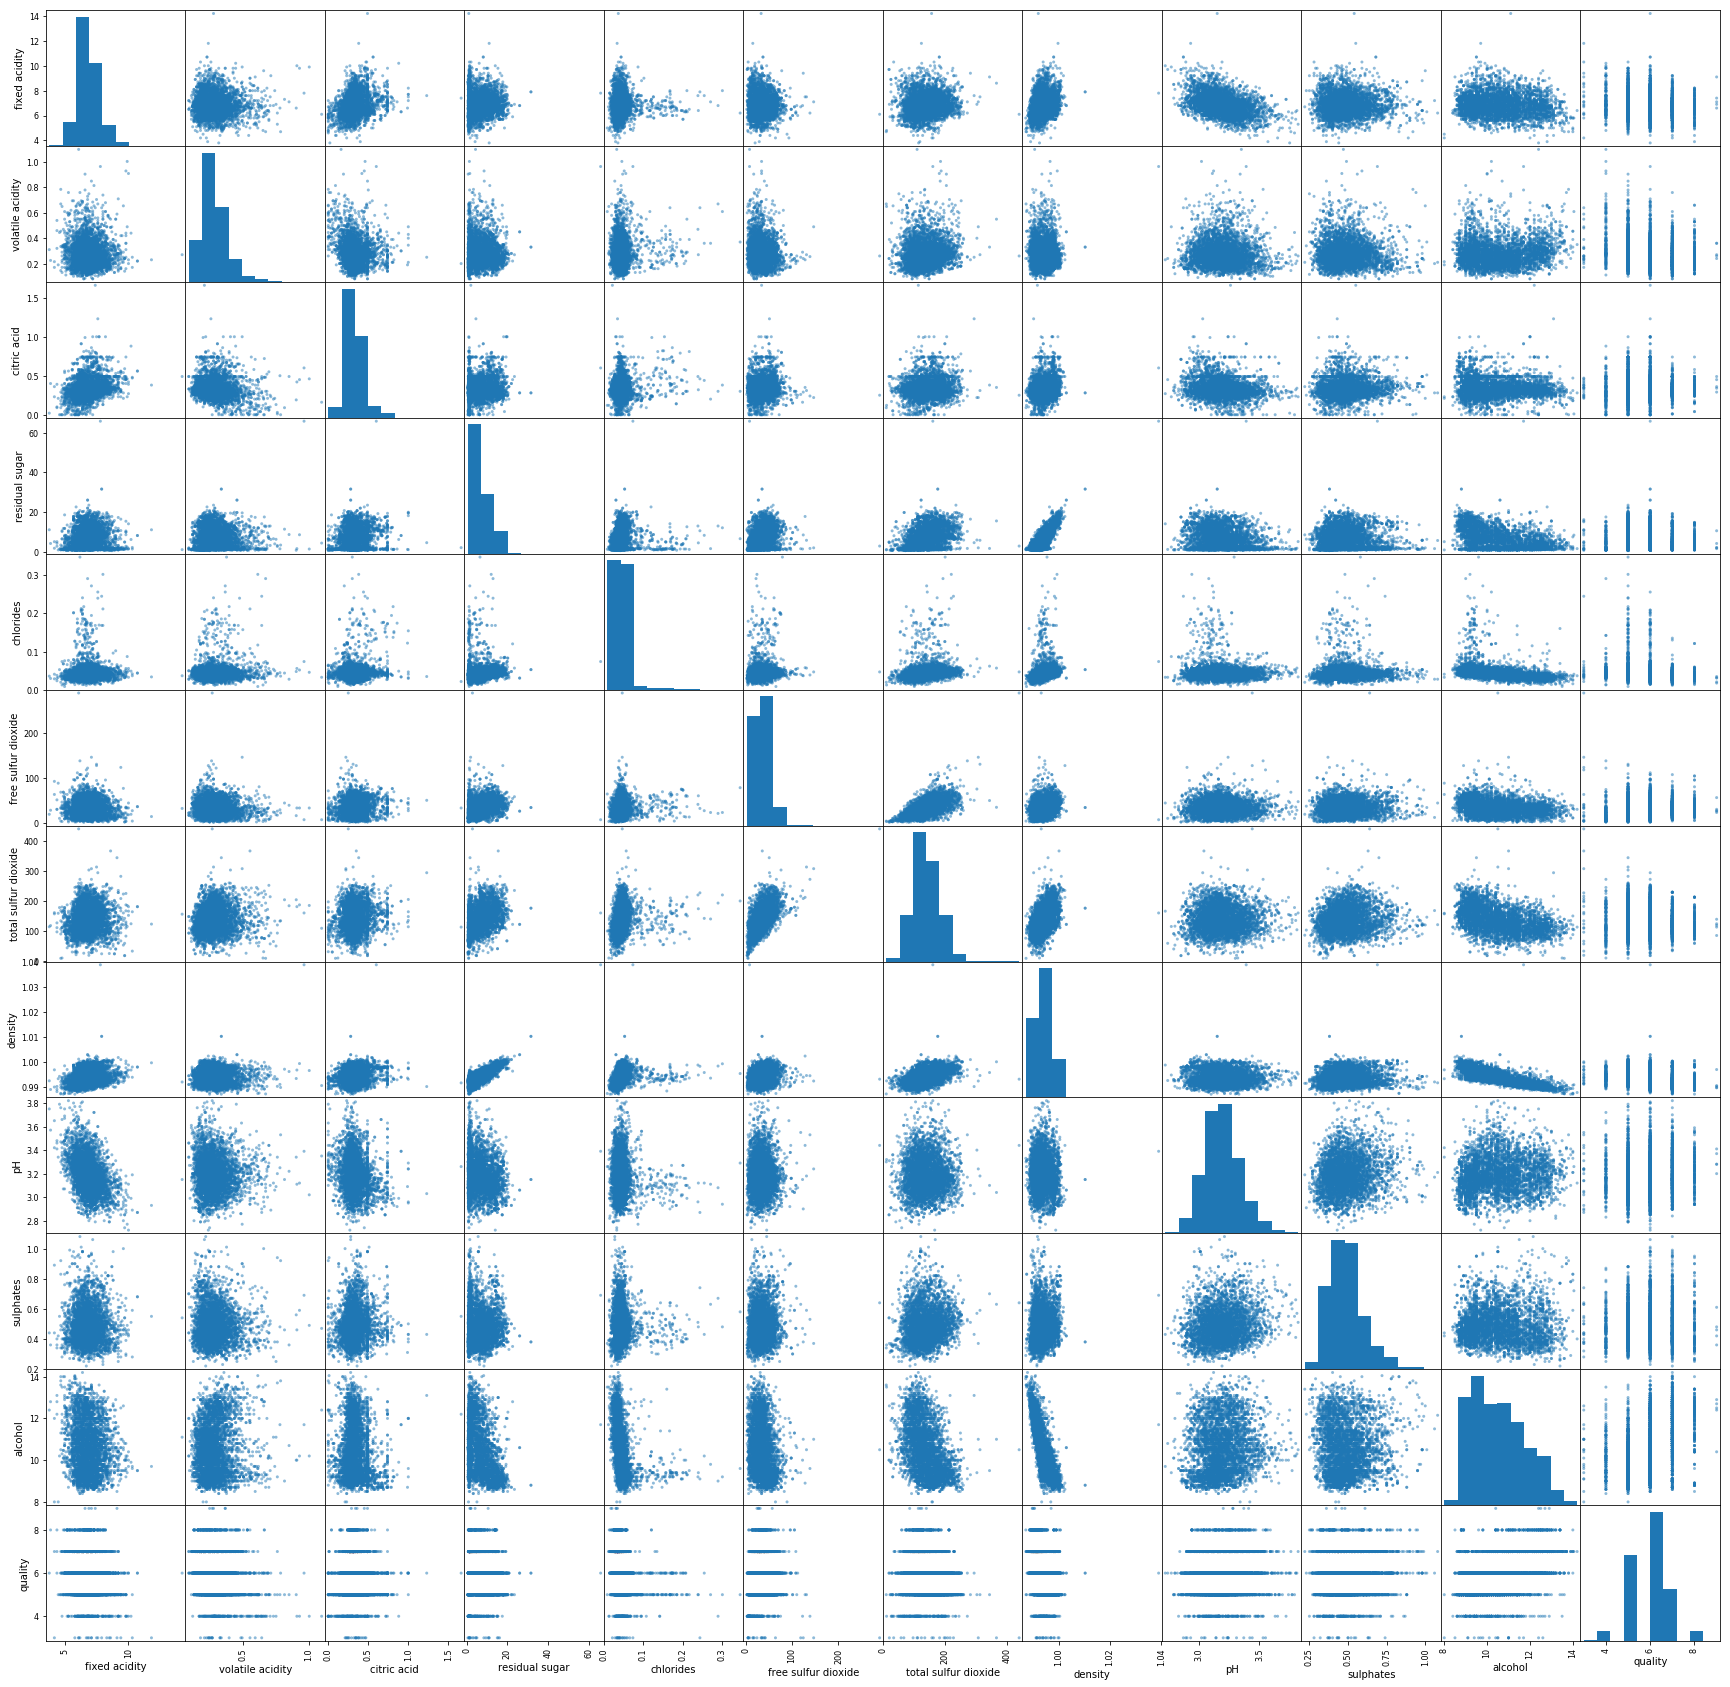

In [6]:
pd.plotting.scatter_matrix(dataset, figsize=(30,30))
plt.show()

In [7]:
def outlier_check(lower_range, col_name):
    c = 0;
    for i in dataset[col_name]:
         if i>lower_range:
             print "Outlier for " + col_name
             print "index: ",c,"value:",i,"\n"
         c+=1

outlier_check(10,'fixed acidity')
outlier_check(1.0,'volatile acidity')
outlier_check(1.0,'citric acid')
outlier_check(60,'residual sugar')
outlier_check(14,'fixed acidity')
outlier_check(0.3,'chlorides')
outlier_check(250,'free sulfur dioxide')
outlier_check(400,'total sulfur dioxide')
outlier_check(1.01,'density')
outlier_check(1.0,'sulphates')

Outlier for fixed acidity
index:  207 value: 10.2 

Outlier for fixed acidity
index:  873 value: 10.3 

Outlier for fixed acidity
index:  1239 value: 10.3 

Outlier for fixed acidity
index:  1372 value: 10.7 

Outlier for fixed acidity
index:  1373 value: 10.7 

Outlier for fixed acidity
index:  1526 value: 14.2 

Outlier for fixed acidity
index:  2050 value: 11.8 

Outlier for volatile acidity
index:  1951 value: 1.005 

Outlier for volatile acidity
index:  4039 value: 1.1 

Outlier for citric acid
index:  745 value: 1.66 

Outlier for citric acid
index:  3152 value: 1.23 

Outlier for residual sugar
index:  2781 value: 65.8 

Outlier for fixed acidity
index:  1526 value: 14.2 

Outlier for chlorides
index:  484 value: 0.346 

Outlier for chlorides
index:  1217 value: 0.301 

Outlier for free sulfur dioxide
index:  4745 value: 289.0 

Outlier for total sulfur dioxide
index:  4745 value: 440.0 

Outlier for density
index:  1653 value: 1.0103 

Outlier for density
index:  1663 value: 1.

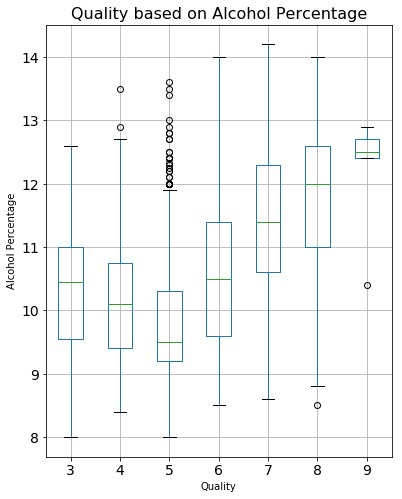

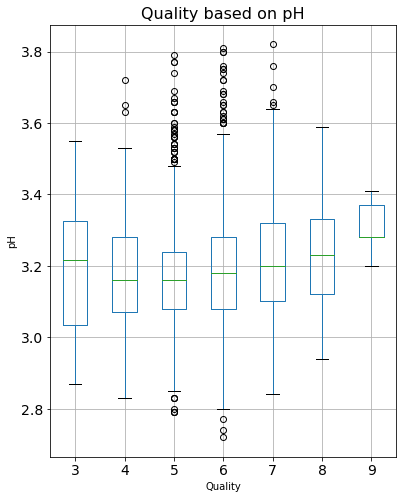

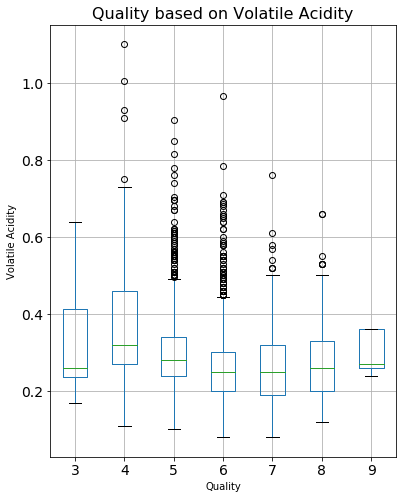

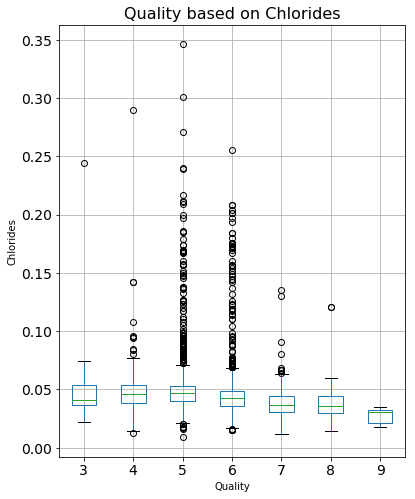

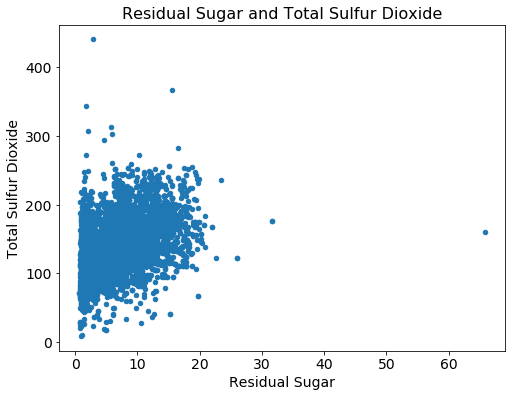

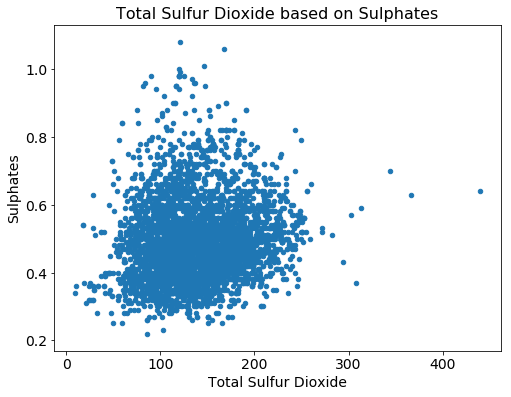

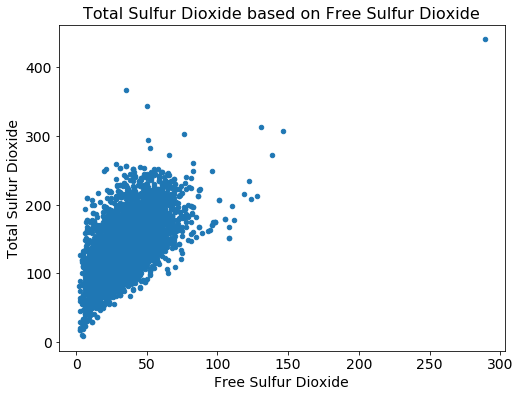

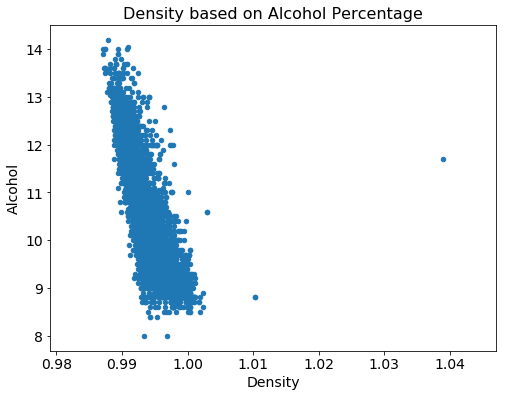

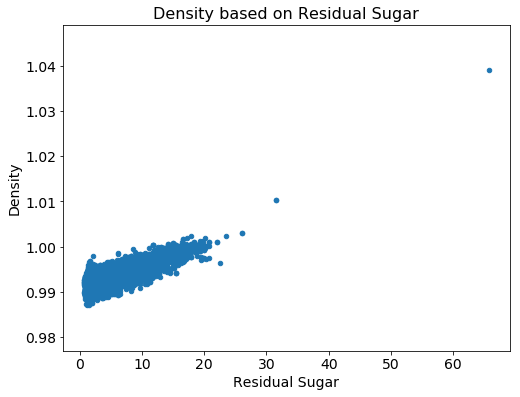

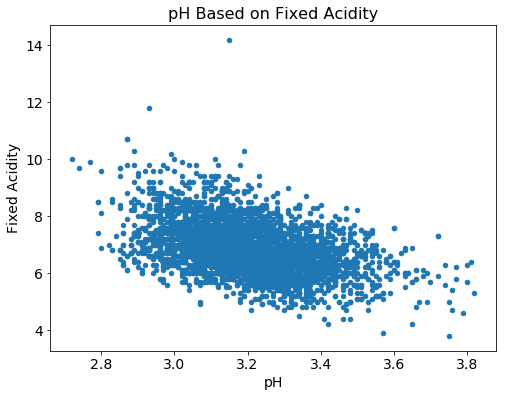

In [8]:
#DATA EXPLORATION AND HYPOTHESIS

#1 Quality and Alcohol
pd.plotting.boxplot(dataset, column='alcohol', by="quality", figsize=(6,8), fontsize=14)
plt.title("Quality based on Alcohol Percentage", fontsize=16)
plt.suptitle('')
plt.xlabel('Quality')
plt.ylabel('Alcohol Percentage')
plt.show()

#Hypothesis: The quality of white wine will increase as it contains higher alcohol percentage
#Wrong, according to the boxplot, the white wines with quality of 5 and below do not necessarily depend on the increase of its alcohol percentage.
#However, the white wines with quality of 6 and above are positively correlated with the increase of its alcohol percentage.
#The alcohol percentage cannot be a parameter to predict the quality of white wines.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#2 Quality and pH
pd.plotting.boxplot(dataset, column='pH', by="quality", figsize=(6,8), fontsize=14)
plt.title("Quality based on pH", fontsize=16)
plt.suptitle('')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

#Hypothesis: The level of pH is not correlated with the quality of white wine.
#Statement is correct, however, most of the white wines have the average pH of 3.2.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#3 Quality and Volatile Acidity
pd.plotting.boxplot(dataset, column='volatile acidity', by="quality", figsize=(6,8), fontsize=14)
plt.title("Quality based on Volatile Acidity", fontsize=16)
plt.suptitle('')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

#Hypothesis: High level of volatile acidity can cause a significant change to wine taste, like a vinegar.
#The quality might go down as the volatile acidity level increases.
#Wrong, the less the volatile acidity level does not necessarily increase the quality of white wine.
# On average, white wine with quality of 9 have more volatile acidity compared to white wines with lower quality.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#4 Quality and Chlorides
pd.plotting.boxplot(dataset, column='chlorides', by="quality", figsize=(6,8), fontsize=14)
plt.title("Quality based on Chlorides", fontsize=16)
plt.suptitle('')
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

#Hypothesis: There is a small negative correlation between chlorides and quality.
#Correct, both attributes are negatively correlated.
#According to the statistic, overall, the higher wine quality contain less chlorides, eventhough the difference is quite small. 
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#5 Total Sulfur Dioxide and Residual Sugar
dataset.plot(kind='scatter', x='residual sugar', y='total sulfur dioxide', figsize=(8,6),fontsize=14)
plt.xlabel("Residual Sugar",fontsize=14)
plt.ylabel("Total Sulfur Dioxide",fontsize=14)
plt.title("Residual Sugar and Total Sulfur Dioxide", fontsize=16)
plt.show()
#Hypothesis: Total sulfur dioxide and residual sugar are correlated as both determine the taste of the wine.
#Correct. Total sulfur dioxide and residual sugar are positively correlated.
#As the residual sugar increases, the total sulfur dioxide increases too.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#6 Total Sulfur Dioxide and Sulphates
dataset.plot(kind='scatter', x='total sulfur dioxide', y='sulphates', figsize=(8,6),fontsize=14)
plt.xlabel("Total Sulfur Dioxide",fontsize=14)
plt.ylabel("Sulphates",fontsize=14)
plt.title("Total Sulfur Dioxide based on Sulphates", fontsize=16)
plt.show()

#Hypothesis: Sulphates contributes to total sulfur dioxide levels, which means they are positively correlated.
#True, when the amount of sulphates increases, the total sulfur dioxide increases too.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#7 Total Sulfur Dioxide and Free Sulfur Dioxide
dataset.plot(kind='scatter', x='free sulfur dioxide', y='total sulfur dioxide', figsize=(8,6),fontsize=14)
plt.xlabel("Free Sulfur Dioxide",fontsize=14)
plt.ylabel("Total Sulfur Dioxide",fontsize=14)
plt.title("Total Sulfur Dioxide based on Free Sulfur Dioxide", fontsize=16)
plt.show()

#Hypothesis: Total sulfur dioxide contains free sulfur dioxide, so they both are positively correlated.
#Correct, the amount of free sulfur dioxed determines the amount of total sulfur dioxide.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#8 Density and Alcohol
dataset.plot(kind='scatter', x='density', y='alcohol', figsize=(8,6),fontsize=14)
plt.xlabel("Density",fontsize=14)
plt.ylabel("Alcohol",fontsize=14)
plt.title("Density based on Alcohol Percentage", fontsize=16)
plt.show()

#Hypothesis:: Alcohol and density have a quite strong negative correlation, when the alcohol level increases, the density decreases.
#True, based on the plot, alcohol and density are negatively correlated.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#9 Density and Residual Sugar
dataset.plot(kind='scatter', x='residual sugar', y='density', figsize=(8,6),fontsize=14)
plt.xlabel("Residual Sugar",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.title("Density based on Residual Sugar", fontsize=16)
plt.show()

#Hypothesis: Residual sugar and density are positively correlated. As described, Density is correlated with alcohol and sugar level.
#According to the statistic, Residual sugar and density are positively correlated. Density increases as the residual sugar increases too.
#-----------------------------------------------------------------------------------------------------------------------------------------------------
#10 pH and Fixed Acidity
dataset.plot(kind='scatter', x='pH', y='fixed acidity', figsize=(8,6),fontsize=14)
plt.xlabel("pH",fontsize=14)
plt.ylabel("Fixed Acidity",fontsize=14)
plt.title("pH Based on Fixed Acidity", fontsize=16)
plt.show()

#Hypothesis: pH is affected by level of acidity, the more fixed acidity in white wine, the lower the pH.
#Correct, both attributes are negatively correlated. The more the acid, the closer the pH to 0.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X = wines[wines.columns[0:11]]
y = wines["reviews"]

def random_forest_model(t_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=t_size)

#clf = KNeighborsClassifier(5,weights="distance", metric="minkowski", p=1)
    clf = RandomForestClassifier(n_estimators=200, random_state=4)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)    

    cm = confusion_matrix(y_test,predicted)
    
    print "Random Forest result for test size", t_size
    print cm
    print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))
    print classification_report(y_test, predicted)

    
    
random_forest_model(0.2)
random_forest_model(0.4)
random_forest_model(0.5)



def k_nearest_model(t_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=t_size, random_state=4)

    clf = KNeighborsClassifier(17, weights="distance", metric="minkowski", p=2)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)    

    cm = confusion_matrix(y_test,predicted)
    
    print "K-nearest result for test size", t_size
    print cm
    print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))
    print classification_report(y_test, predicted)

k_nearest_model(0.5)
k_nearest_model(0.4)
k_nearest_model(0.2)




Random Forest result for test size 0.2
[[  0   4   0]
 [  0 935   0]
 [  0  23  18]]
[Train/test split] score: 0.97245
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.97      1.00      0.99       935
           3       1.00      0.44      0.61        41

   micro avg       0.97      0.97      0.97       980
   macro avg       0.66      0.48      0.53       980
weighted avg       0.97      0.97      0.97       980



/Users/susankid/anaconda2/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest result for test size 0.4
[[   0    9    0]
 [   0 1879    3]
 [   0   46   22]]
[Train/test split] score: 0.97039
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.97      1.00      0.98      1882
           3       0.88      0.32      0.47        68

   micro avg       0.97      0.97      0.97      1959
   macro avg       0.62      0.44      0.49      1959
weighted avg       0.96      0.97      0.96      1959

Random Forest result for test size 0.5
[[   0   13    0]
 [   0 2352    3]
 [   0   60   20]]
[Train/test split] score: 0.96895
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.97      1.00      0.98      2355
           3       0.87      0.25      0.39        80

   micro avg       0.97      0.97      0.97      2448
   macro avg       0.61      0.42      0.46      2448
weighted avg       0.96      0.97    